Começamos importando as bibliotecas de interesse para nossa análise, e como dados iremos usar um dataframe de minha própria lavra, contendo apenas os resultados da classificação do campeonato brasileiro do ano de 2019

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
b19 = pd.read_csv("/content/Brasileirão 2019 Série A, por rodadas - Página1.csv")
b19

,Posição,Clube,PG,JG,V,E,D,GP,GC,SG,Rodada
0,1,Ceara,3.0,1.0,1.0,0.0,0.0,4.0,0.0,4,1
1,2,Palmeiras,3.0,1.0,1.0,0.0,0.0,4.0,0.0,4,1
2,3,Atletico_PR,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3,1
3,4,Flamengo,3.0,1.0,1.0,0.0,0.0,3.0,1.0,2,1
4,5,São_Paulo,3.0,1.0,1.0,0.0,0.0,2.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
755,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38
756,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38
757,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38
758,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38


Como existem muitos valores que ainda não foram inclusos, vamos filtrar o dataframe para deixar apenas as rodadas que já foram preenchidas. No caso até o presente temos até a 24ª rodada

In [ ]:
b19_filtrado = b19.dropna()
b19_filtrado.tail()

,Posição,Clube,PG,JG,V,E,D,GP,GC,SG,Rodada
675,16,Ceara,37.0,34.0,10.0,7.0,17.0,33.0,34.0,-1,34
676,17,Cruzeiro,36.0,34.0,7.0,15.0,12.0,27.0,40.0,-13,34
677,18,CSA,29.0,34.0,7.0,8.0,19.0,21.0,51.0,-30,34
678,19,Chapecoense,28.0,34.0,6.0,10.0,18.0,27.0,48.0,-21,34
679,20,Avai,18.0,34.0,3.0,9.0,22.0,16.0,52.0,-36,34


Vamos verificar se todos os clubes estão com os nomes escritos corretamente:

In [ ]:
b19_filtrado.Clube.unique()

array(['Ceara', 'Palmeiras', 'Atletico_PR', 'Flamengo', 'São_Paulo',
       'Chapecoense', 'Bahia', 'Atletico_MG', 'Santos', 'Goias',
       'Corintians', 'Avai', 'Gremio', 'Fluminense', 'Cruzeiro',
       'Internacional', 'Botafogo', 'Vasco', 'CSA', 'Fortaleza',
       'Atletico_pR', 'Atletico', 'Cruzeiro-MG'], dtype=object)

Atletico paranaense tem duas grafias: Atletico_pR e Atletico_PR, precisamos consertar. 

In [ ]:
novos_nomes= {'Atletico_pR':'Atletico_PR', 'São_Paulo': 'SP', 'Flamengo': 'Fla', 'Fluminense': 'Flu'}
for i in range(len(b19_filtrado.Clube)):
  if b19_filtrado.Clube[i] == "Atletico_pR":
    b19_filtrado.Clube[i] = "Atletico_PR"

Vamos agora observar um exemplo de vetor de posição, no time do Flamengo. O vetor de posição é um vetor ordenado que contem a classificação do time em cada rodada. 

In [ ]:
fla = b19_filtrado[b19_filtrado.Clube == 'Flamengo']
fla

,Posição,Clube,PG,JG,V,E,D,GP,GC,SG,Rodada
3,4,Flamengo,3.0,1.0,1.0,0.0,0.0,3.0,1.0,2,1
26,7,Flamengo,3.0,2.0,1.0,0.0,1.0,4.0,3.0,1,2
48,9,Flamengo,4.0,3.0,1.0,1.0,1.0,5.0,4.0,1,3
66,7,Flamengo,7.0,4.0,2.0,1.0,1.0,7.0,5.0,2,4
88,9,Flamengo,7.0,5.0,2.0,1.0,2.0,8.0,7.0,1,5
105,6,Flamengo,10.0,6.0,3.0,1.0,2.0,11.0,9.0,2,6
124,5,Flamengo,13.0,7.0,4.0,1.0,2.0,13.0,9.0,4,7
145,6,Flamengo,14.0,8.0,4.0,2.0,2.0,13.0,9.0,4,8
162,3,Flamengo,17.0,9.0,5.0,2.0,2.0,15.0,9.0,6,9
182,3,Flamengo,20.0,10.0,6.0,2.0,2.0,21.0,10.0,11,10


Nosso intuito é tomar a classificação de um time como sendo indicador de sua força e que isso possa nos ajudar a prever o resultado de um jogo com base na diferença entre as posições. Mas nesse sentido cabe notar que a classificação reflete a força do time no campeonato de maneira inversa. Ou seja, o time com a classificação 1, menor de todas, é na verdade o melhor colocado. Por isso vamos incluir uma nova coluna no dataframe do flamengo, chamada forca_relativa, que será uma medida inversa da posição

In [ ]:
fla['forca_relativa'] = 21 - fla['Posição']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fla

,Posição,Clube,PG,JG,V,E,D,GP,GC,SG,Rodada,forca_relativa
3,4,Flamengo,3.0,1.0,1.0,0.0,0.0,3.0,1.0,2,1,17
26,7,Flamengo,3.0,2.0,1.0,0.0,1.0,4.0,3.0,1,2,14
48,9,Flamengo,4.0,3.0,1.0,1.0,1.0,5.0,4.0,1,3,12
66,7,Flamengo,7.0,4.0,2.0,1.0,1.0,7.0,5.0,2,4,14
88,9,Flamengo,7.0,5.0,2.0,1.0,2.0,8.0,7.0,1,5,12
105,6,Flamengo,10.0,6.0,3.0,1.0,2.0,11.0,9.0,2,6,15
124,5,Flamengo,13.0,7.0,4.0,1.0,2.0,13.0,9.0,4,7,16
145,6,Flamengo,14.0,8.0,4.0,2.0,2.0,13.0,9.0,4,8,15
162,3,Flamengo,17.0,9.0,5.0,2.0,2.0,15.0,9.0,6,9,18
182,3,Flamengo,20.0,10.0,6.0,2.0,2.0,21.0,10.0,11,10,18


Agora vamos plotar um gráfico da evolução temporal da posição com a rodada


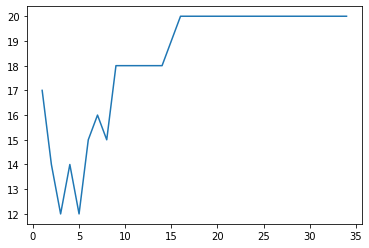

In [ ]:
plt.plot(fla.Rodada, fla.forca_relativa)

In [ ]:
colunas = ['Posição', 'Clube', 'PG','JG', 'V', 'GP','GC']
bres = pd.DataFrame()
for col in colunas:
  bres[col] = b19_filtrado[col]
bres

,Posição,Clube,PG,JG,V,GP,GC
0,1,Ceara,3.0,1.0,1.0,4.0,0.0
1,2,Palmeiras,3.0,1.0,1.0,4.0,0.0
2,3,Atletico_PR,3.0,1.0,1.0,4.0,1.0
3,4,Flamengo,3.0,1.0,1.0,3.0,1.0
4,5,São_Paulo,3.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...
675,16,Ceara,37.0,34.0,10.0,33.0,34.0
676,17,Cruzeiro,36.0,34.0,7.0,27.0,40.0
677,18,CSA,29.0,34.0,7.0,21.0,51.0
678,19,Chapecoense,28.0,34.0,6.0,27.0,48.0


Na célula acima criei um dataframe chamado bres, ou seja, brasileiro resumido. Retirei algumas colunas inúteis.

Talvez seja interessante acrescentar o força_relativa para todos os times do campeonato, já no dataframe original


In [ ]:
b19_filtrado['forca_relativa'] = 21 - b19_filtrado['Posição']
b19_filtrado  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Posição,Clube,PG,JG,V,E,D,GP,GC,SG,Rodada,forca_relativa
0,1,Ceara,3.0,1.0,1.0,0.0,0.0,4.0,0.0,4,1,20
1,2,Palmeiras,3.0,1.0,1.0,0.0,0.0,4.0,0.0,4,1,19
2,3,Atletico_PR,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3,1,18
3,4,Flamengo,3.0,1.0,1.0,0.0,0.0,3.0,1.0,2,1,17
4,5,São_Paulo,3.0,1.0,1.0,0.0,0.0,2.0,0.0,2,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...
675,16,Ceara,37.0,34.0,10.0,7.0,17.0,33.0,34.0,-1,34,5
676,17,Cruzeiro,36.0,34.0,7.0,15.0,12.0,27.0,40.0,-13,34,4
677,18,CSA,29.0,34.0,7.0,8.0,19.0,21.0,51.0,-30,34,3
678,19,Chapecoense,28.0,34.0,6.0,10.0,18.0,27.0,48.0,-21,34,2


In [ ]:
bres['forca_relativa'] = bres['PG']/(3*bres['JG'])
bres


,Posição,Clube,PG,JG,V,GP,GC,forca_relativa
0,1,Ceara,3.0,1.0,1.0,4.0,0.0,1.000000
1,2,Palmeiras,3.0,1.0,1.0,4.0,0.0,1.000000
2,3,Atletico_PR,3.0,1.0,1.0,4.0,1.0,1.000000
3,4,Flamengo,3.0,1.0,1.0,3.0,1.0,1.000000
4,5,São_Paulo,3.0,1.0,1.0,2.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
675,16,Ceara,37.0,34.0,10.0,33.0,34.0,0.362745
676,17,Cruzeiro,36.0,34.0,7.0,27.0,40.0,0.352941
677,18,CSA,29.0,34.0,7.0,21.0,51.0,0.284314
678,19,Chapecoense,28.0,34.0,6.0,27.0,48.0,0.274510


In [ ]:
vas = bres[bres['Clube']=='Vasco']
fla = bres[bres['Clube']=='Flamengo']
flu =bres[bres['Clube']=='Fluminense']
bot = bres[bres['Clube']=='Botafogo']


Text(0.5, 0, 'RODADA')

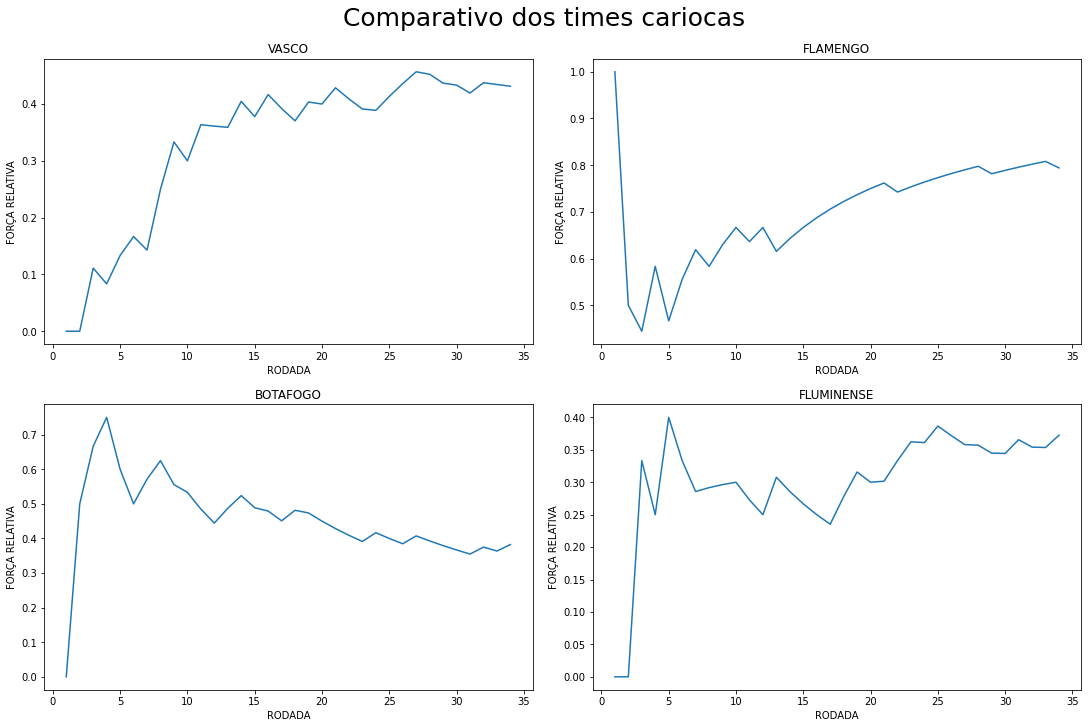

In [ ]:
fig_1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout = True, figsize = (15,10))
fig_1.suptitle('Comparativo dos times cariocas', size = 25)

f1_axes[0,0].plot(vas['JG'],vas['forca_relativa'])
f1_axes[0,0].set_title('VASCO')
f1_axes[0,0].set_ylabel("FORÇA RELATIVA")
f1_axes[0,0].set_xlabel('RODADA')

f1_axes[0,1].plot(fla['JG'],fla['forca_relativa'])
f1_axes[0,1].set_title('FLAMENGO')
f1_axes[0,1].set_ylabel("FORÇA RELATIVA")
f1_axes[0,1].set_xlabel('RODADA')


f1_axes[1,0].plot(bot['JG'],bot['forca_relativa'])
f1_axes[1,0].set_title('BOTAFOGO')
f1_axes[1,0].set_ylabel("FORÇA RELATIVA")
f1_axes[1,0].set_xlabel('RODADA')


f1_axes[1,1].plot(flu['JG'],flu['forca_relativa'])
f1_axes[1,1].set_title('FLUMINENSE')
f1_axes[1,1].set_ylabel("FORÇA RELATIVA")
f1_axes[1,1].set_xlabel('RODADA')


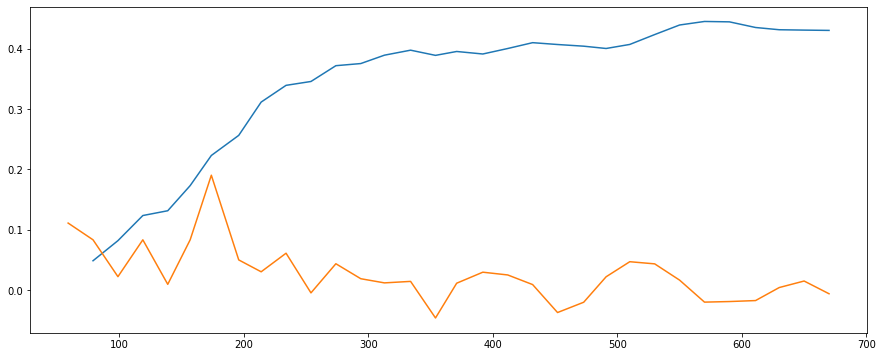

In [ ]:
vas["forca_relativa"].rolling(4).mean().plot(figsize =(15,6))
vas.forca_relativa.diff(2).plot(figsize= (15,6))

In [ ]:
fla.forca_relativa.diff().plot(15,6)

In [ ]:
fla2, fla2_axes = plt.subplots(ncols = 3, nrows = 3, figsize = (30,20))
fla2_axes[0,0].plot(fla["forca_relativa"].rolling(1).mean().plot())
fla2_axes[0,1].plot(fla["forca_relativa"].rolling(2).mean().plot())
fla2_axes[0,2].plot(fla["forca_relativa"].rolling(3).mean().plot())
fla2_axes[1,0].plot(fla["forca_relativa"].rolling(4).mean().plot())
fla2_axes[1,1].plot(fla["forca_relativa"].rolling(5).mean().plot())
fla2_axes[1,2].plot(fla["forca_relativa"].rolling(6).mean().plot())

In [ ]:
vetor = av.forca_relativa
vetor

In [ ]:
bres

,Posição,Clube,PG,JG,V,GP,GC,forca_relativa
0,1,Ceara,3.0,1.0,1.0,4.0,0.0,1.000000
1,2,Palmeiras,3.0,1.0,1.0,4.0,0.0,1.000000
2,3,Atletico_PR,3.0,1.0,1.0,4.0,1.0,1.000000
3,4,Flamengo,3.0,1.0,1.0,3.0,1.0,1.000000
4,5,São_Paulo,3.0,1.0,1.0,2.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
675,16,Ceara,37.0,34.0,10.0,33.0,34.0,0.362745
676,17,Cruzeiro,36.0,34.0,7.0,27.0,40.0,0.352941
677,18,CSA,29.0,34.0,7.0,21.0,51.0,0.284314
678,19,Chapecoense,28.0,34.0,6.0,27.0,48.0,0.274510


In [ ]:
bgru = bres[["Clube", 'JG']].groupby('Clube').sum()

In [ ]:
bgru

,JG
Clube,
Atletico,26.0
Atletico_MG,569.0
Atletico_PR,588.0
Atletico_pR,7.0
Avai,595.0
Bahia,595.0
Botafogo,595.0
CSA,599.0
Ceara,595.0
